VENDAS DE UMA CONCESSIONÁRIA DE VEICULOS USADOS

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('carros_usados.xls')

In [3]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
data.set             7495 non-null object
total.cost           7495 non-null int64
lot.sale.days        7495 non-null int64
overage              7495 non-null object
mileage              7495 non-null int64
vehicle.type         7495 non-null object
domestic.import      7495 non-null object
vehicle.age          7495 non-null int64
vehicle.age.group    7495 non-null object
color.set            7495 non-null object
makex                7495 non-null object
state                7495 non-null object
make.model           7495 non-null object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [5]:
df.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [6]:
#consultando  dados nulos o missing values no Dataframe
df.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

In [7]:
#ANALISE EXPLORATPORIA DE DADOS
import seaborn as sns
from matplotlib import pyplot as plt

In [8]:
#DEFINE UM ESTILO PARA NOSSOS PLOTS
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


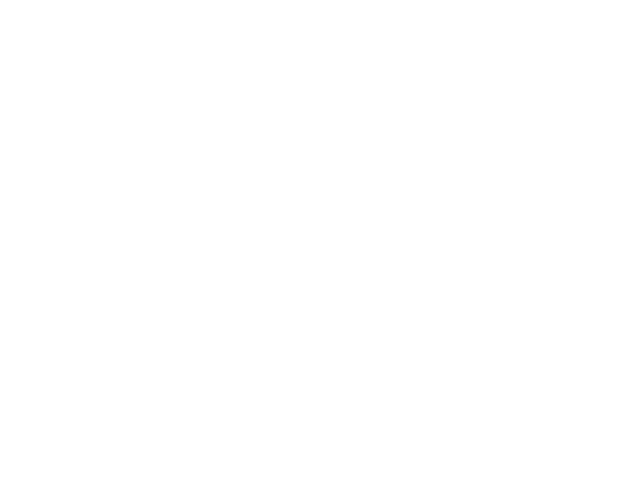

C:\Users\Rennan Cardoso\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribuição da coluna total.cost')

In [9]:
%matplotlib notebook
sns.distplot(df['total.cost'], color='blue', kde=False)
plt.title('Distribuição da coluna total.cost')

<IPython.core.display.Javascript object>


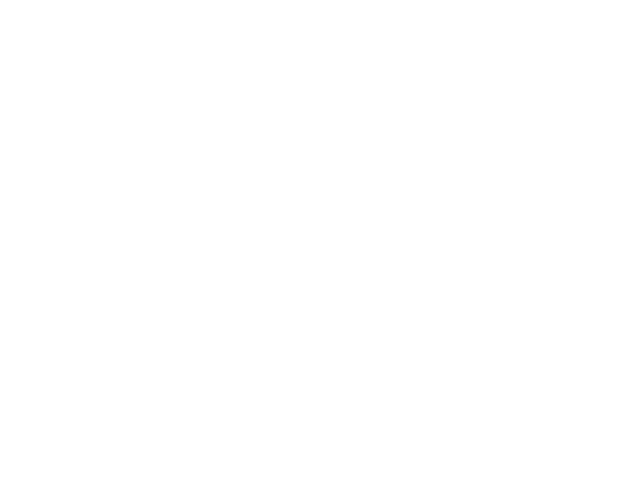

Text(0.5,1,'Distribuiçãod da coluna lot.sale.days')

In [10]:
%matplotlib notebook
# QUAL A QUANTIDADE MÉDIA DE DIAS EM QUE OS CARROS FICAM NA CONCESSIONARIA
sns.distplot(df['lot.sale.days'], color='red', kde=False)
plt.title('Distribuiçãod da coluna lot.sale.days')

<IPython.core.display.Javascript object>


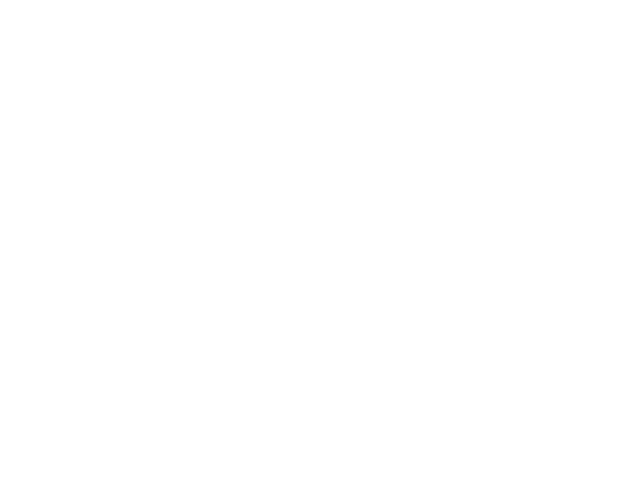

Text(0.5,1,'Distribuição da coluna mileage')

In [11]:
'''
PODEMOS OBSERVAR QUE OS DIAS DE VENDAS SÃO INCLINADOS PARA O LADO ESQUERDO, ISSO NOS MOSTRA QUE A MAIORIA DOS CARROS
SÃO VENDIDOS NOS PRIMEIROS 90 DIAS.

OS RESTANTES 20% SAO VENDIDOS APOS 20 DIAS E SAO VENDIDOS A PREÇO DE DESCONTO.

'''
#QUAL A KILOMETRAGEM MÉDIA DOS VEÍCULOS DA CONCESSIONÁRIA? 
%matplotlib notebook
sns.distplot(df['mileage'], color ='green', kde=False)
plt.title('Distribuição da coluna mileage')

<IPython.core.display.Javascript object>


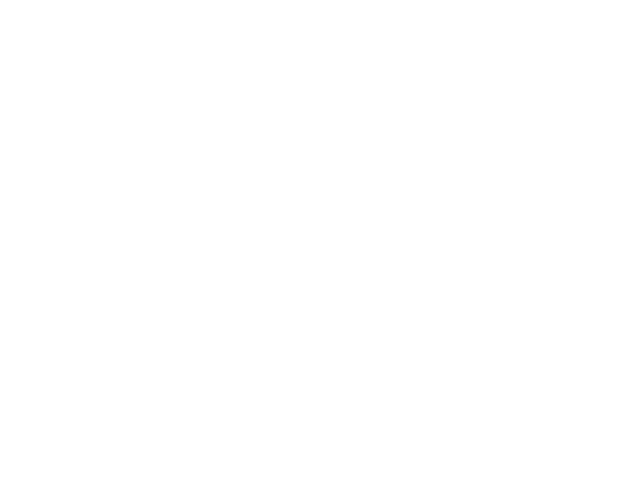

Text(0.5,1,'Distribuição de idade dos veículos')

In [12]:
#Qual a idade média dos veículos da concessionária?
%matplotlib notebook
sns.distplot(df['vehicle.age'], color='black', kde=False)
plt.title('Distribuição de idade dos veículos')

In [13]:
#VISUALIZANDO A CORRELAÇÃO ENTRE ALGUMAS VARIÁVEIS
'''
 - O QUANTO ALGUMA VARIÁVEL NUMÉRICA TEM CORRELAÇÃO COM A OUTRA VARIÁVEL?
 - CORRELAÇÃO PODE SER POSITIVA OU NEGATIVA
'''

df[['mileage', 'vehicle.age', 'lot.sale.days','total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


In [14]:
df[['mileage', 'vehicle.age', 'lot.sale.days','total.cost']].corr()


,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


In [15]:
correlacoes = df[['mileage', 'vehicle.age', 'lot.sale.days','total.cost']].corr()

<IPython.core.display.Javascript object>


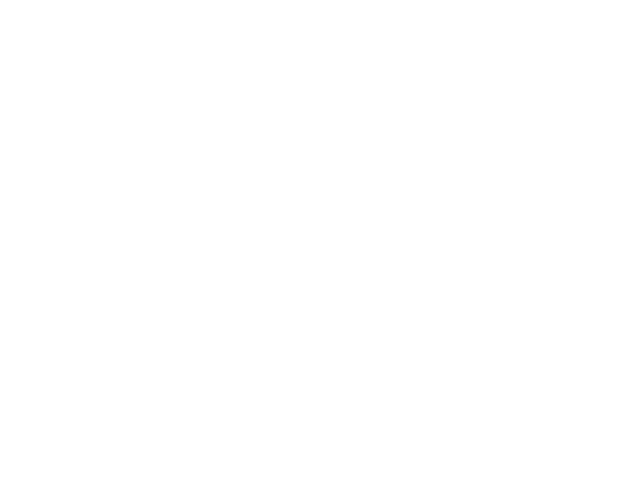

In [16]:
#plot o mata de calor para visualizar as correlações
%matplotlib notebook
sns.heatmap(correlacoes, annot=True, cmap="YlGnBu")

<IPython.core.display.Javascript object>


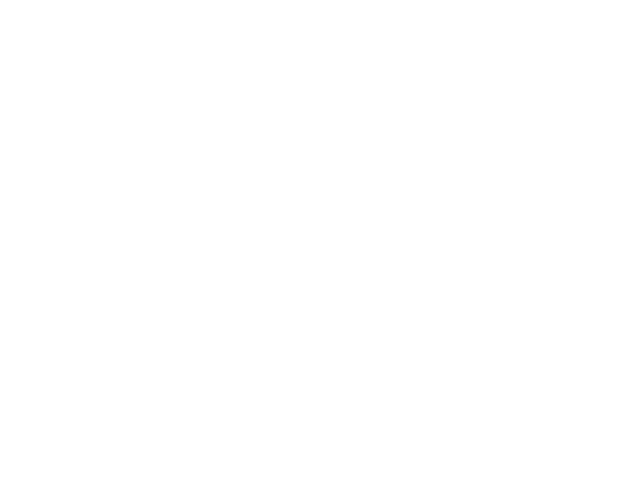

In [17]:
#VISUALIZANDO DISPERSSÃO ENTRE OS DIAS DE VENDAS E ALGUMAS VARIÁVEIS
%matplotlib notebook
sns.scatterplot(x='lot.sale.days', y='total.cost', data=df)

<IPython.core.display.Javascript object>


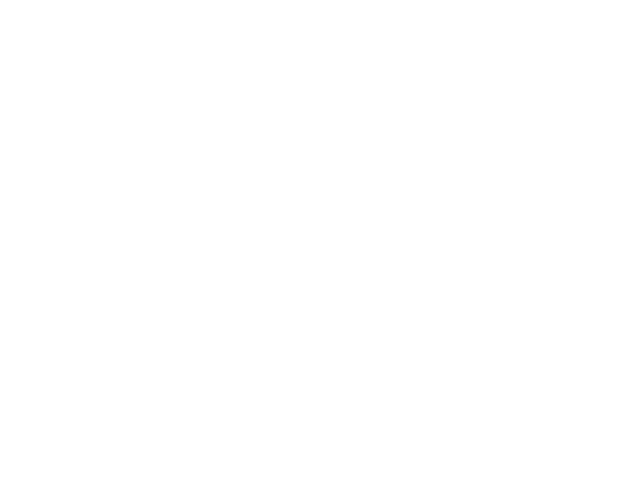

In [18]:
%matplotlib notebook
sns.scatterplot(x='lot.sale.days', y='mileage', color='green', data=df)

<IPython.core.display.Javascript object>


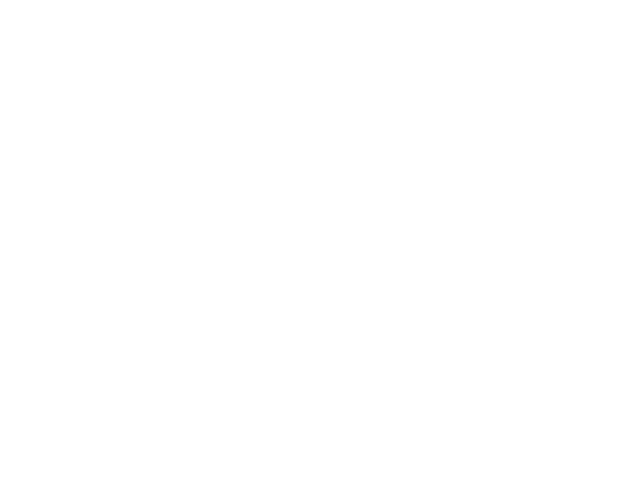

In [19]:
#tempo médio de vendas por tipo de veiculos

%matplotlib notebook
sns.boxplot(x='domestic.import', y='lot.sale.days', data=df)

<IPython.core.display.Javascript object>


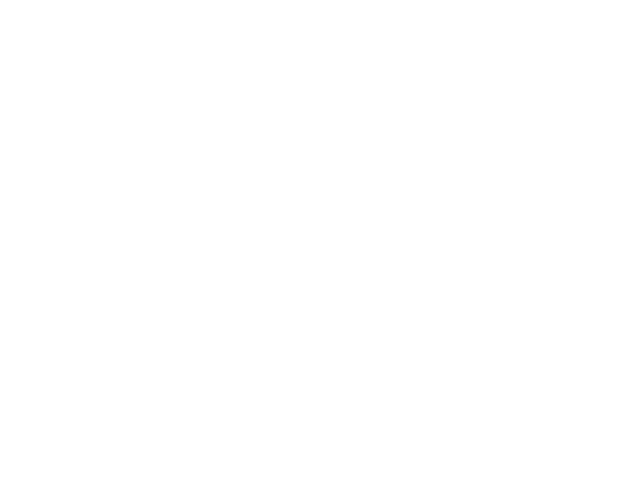

In [20]:
#tempo médio de vendas por tipo de veiculos

%matplotlib notebook
sns.boxplot(x='vehicle.type', y='lot.sale.days', data=df)

<IPython.core.display.Javascript object>


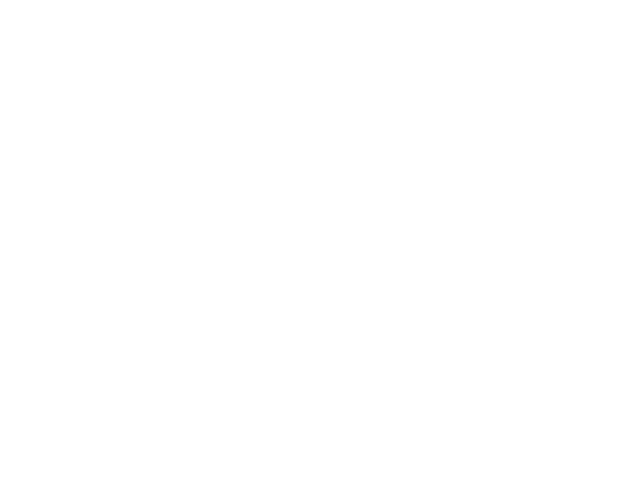

In [21]:
#tempo médio de vendas por cor de veiculos

#tempo médio de vendas por tipo de veiculos

%matplotlib notebook
sns.boxplot(x='color.set', y='lot.sale.days', data=df)

<IPython.core.display.Javascript object>


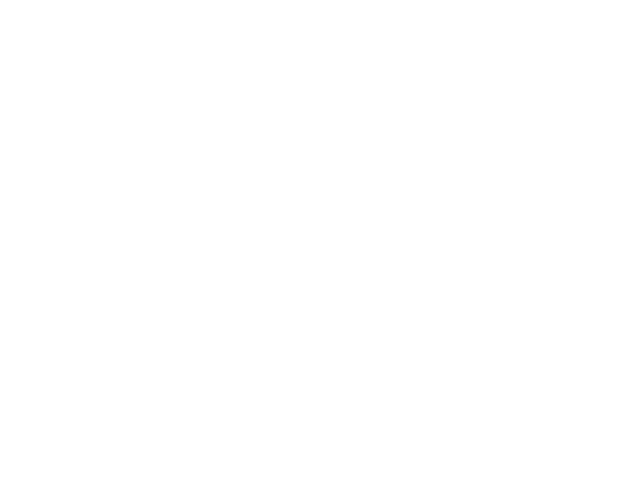

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

In [22]:
#tempo médio de vendas por marcas de veiculos

%matplotlib notebook
sns.boxplot(x='makex', y='lot.sale.days', data=df)
plt.xticks(size=5)

<IPython.core.display.Javascript object>


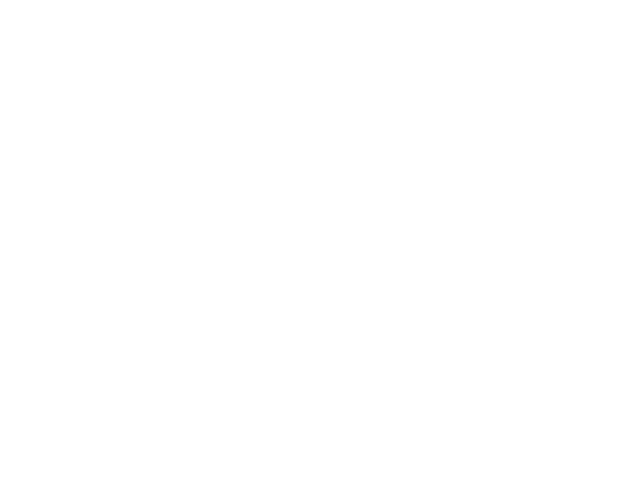

In [23]:
#tempo médio de vendas por tipo de veiculos

%matplotlib notebook
sns.boxplot(x='state', y='lot.sale.days', data=df)

# construindo um modelo de machine leraning

In [24]:
df.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


# pre-processamento dos dados


In [25]:
#removendo a coluna vehicle.age.group
df.drop('vehicle.age.group', axis=1, inplace=True)


In [26]:
df.drop('data.set', axis=1, inplace=True)


In [27]:
#Aplicando o LabelEncoder para codificação das variáveis categóricas
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [29]:
df['vehicle.type'] = label_encoder1.fit_transform(df['vehicle.type'])
df['domestic.import'] = label_encoder2.fit_transform(df['domestic.import'])
df['color.set'] = label_encoder3.fit_transform(df['color.set'])
df['makex'] = label_encoder4.fit_transform(df['makex'])
df['state'] = label_encoder5.fit_transform(df['state'])
df['make.model'] = label_encoder6.fit_transform(df['make.model'])

In [30]:
#Visualizando dados transformados
df.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77


In [31]:
#Separa o calsse dos dados
y = df['overage']

In [32]:
#Apaga a coluna overage e a coluna lot.das.sales
X = df.drop(['lot.sale.days','overage'], axis=1)
X.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


In [33]:
#Separando os dados de treino e teste
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y) 

In [34]:
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [35]:
y_treino.count()

5621

In [36]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [37]:
y_teste.count()

1874

# Aplicando Machine Learning com Arvore de Decisão


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import tree

In [39]:
arvore = tree.DecisionTreeClassifier()

In [40]:
arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
#VALIDAÇÃO DO MODELO
resultado = arvore.predict(X_teste)

In [42]:
resultado

array(['YES', 'YES', 'YES', ..., 'YES', 'YES', 'NO'], dtype=object)

In [43]:
from sklearn import metrics

In [44]:
print(metrics.classification_report(y_teste, resultado))

              precision    recall  f1-score   support

          NO       0.65      0.66      0.65       995
         YES       0.60      0.59      0.60       879

   micro avg       0.63      0.63      0.63      1874
   macro avg       0.63      0.62      0.63      1874
weighted avg       0.63      0.63      0.63      1874



CONCLUSÕES:
- Obitivemos uma precisão de 62% para classificar carros que superam os 90 dias
- O modelo pode melhorar se trabalhar mais nos dados, e com um trabalho de engenharia de features. 


In [45]:
# FEATURES MAIS IMPORTANTES PARA O MODELO
arvore.feature_importances_

array([0.27320155, 0.1977899 , 0.07592214, 0.01292459, 0.08558094,
       0.08884654, 0.03412618, 0.07999669, 0.15161147])

In [46]:
feature_imp = pd.Series(arvore.feature_importances_,index=X_treino.columns)

In [47]:
feature_imp

total.cost         0.273202
mileage            0.197790
vehicle.type       0.075922
domestic.import    0.012925
vehicle.age        0.085581
color.set          0.088847
makex              0.034126
state              0.079997
make.model         0.151611
dtype: float64

<IPython.core.display.Javascript object>


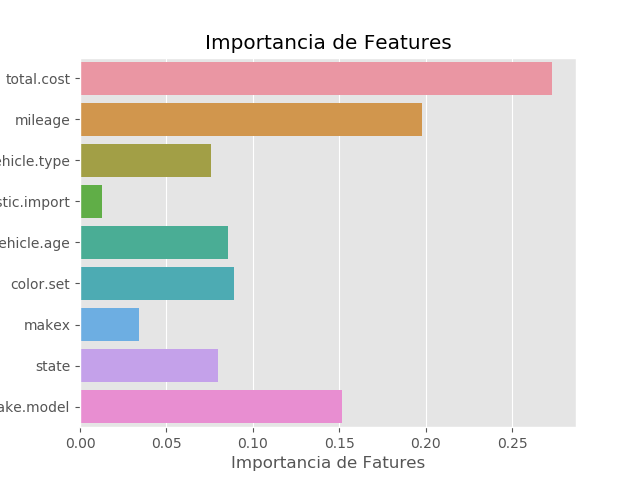

In [48]:
%matplotlib notebook
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importancia de Fatures')
plt.ylabel('Features')
plt.title('Importancia de Features')
plt.show()

In [49]:
!pip install pydot
!pip install graphviz

In [50]:
import pydot
import graphviz
from ipywidgets import interactive

In [51]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Users/Rennan Cardoso/Anaconda3/Lib/site-packages/graphviz/'


In [52]:
dot_data = tree.export_graphviz(
            arvore,
            feature_names=X.columns,
            class_names=y,
            max_depth=3,
            filled=True,
            rounded=True,
            node_ids=True,
            label='all',
            )
graph = graphviz.Source(dot_data)
graph

RuntimeError: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' path